In [ ]:
import Pkg; Pkg.activate("."); Pkg.instantiate();

In [1]:
# using GLMakie
using CairoMakie
using Makie.GeometryBasics
using Plots
using JLD

In [3]:
agent_x=load("data/data.jld")["data"];

In [4]:
#Plot a Polygon for ship
function get_position_course(cen,θ,v,l,d,l0)
    l1=l0+v
    x1=cen[1]-l*cos(θ)+(d-0.3)*sin(θ)
    y1=cen[2]-l*sin(θ)-(d-0.3)*cos(θ)
    x2=cen[1]+l*cos(θ)+d*sin(θ)
    y2=cen[2]+l*sin(θ)-d*cos(θ)
    x3=cen[1]+l*cos(θ)-d*sin(θ)
    y3=cen[2]+l*sin(θ)+d*cos(θ)
    x4=cen[1]-l*cos(θ)-(d-0.3)*sin(θ)
    y4=cen[2]-l*sin(θ)+(d-0.3)*cos(θ)
    x5=cen[1]+(l+l0)*cos(θ)
    y5=cen[2]+(l+l0)*sin(θ)
    x6=cen[1]+(l+l1)*cos(θ)
    y6=cen[2]+(l+l1)*sin(θ)
    return x1,y1, x2,y2,x5,y5, x3,y3, x4,y4,x6,y6
end

get_position_course (generic function with 1 method)

In [5]:
cen=[2.0;2.0]
θ=π/8
l=5
d=3
l0=2
v=2
x1,y1, x2,y2,x5,y5, x3,y3, x4,y4,x6,y6=get_position_course(cen,θ,v,l,d,l0)


(-1.5861523951706915, -2.4078918996059233, 7.767447959651703, 1.141778564291589, 8.467156727579006, 4.678784026555629, 5.471347365461165, 6.685055759359309, -3.6526429299421763, 2.5810575759550254, 10.31491579260158, 5.444150891285808)

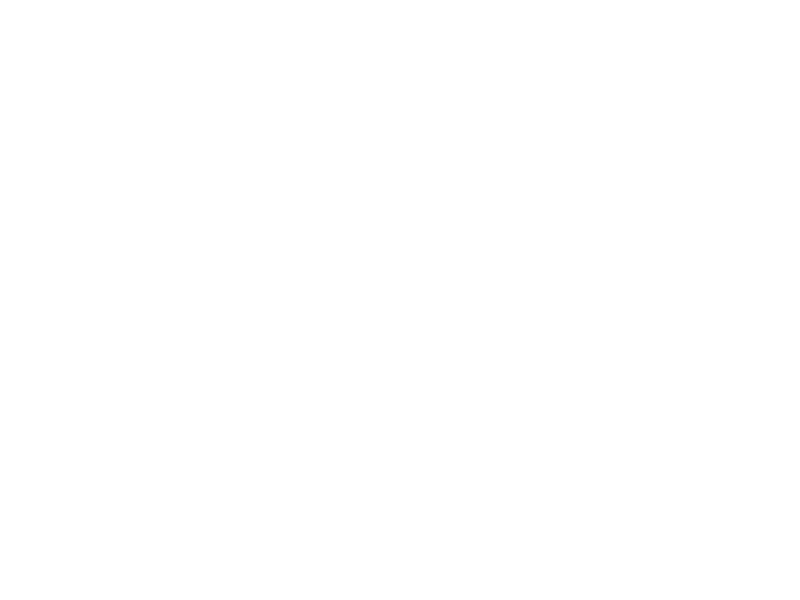

In [6]:
x0 = 0.5
y0 = 0.5
plo= Observable([Point2f(x1,y1), Point2f(x2,y2), Point2f(x5,y5), Point2f(x3,y3),Point2f(x4,y4)])
arr=Observable([Point2f(cen), Point2f(x6,y6)])
fig = Figure(); display(fig)
ax = Axis(fig[1,1]);

In [8]:
x_target=[100.0,100.0,0.0*π,3.0]
port = Polygon(
    Point2f[[x_target[1]-5,x_target[2]-9], [x_target[1]+5,x_target[2]-9],[x_target[1]+5,x_target[2]+9], [x_target[1]-5,x_target[2]+9]],
)
poly!(port, color = :grey,strokecolor = :black,strokewidth = 1,alpha=0.01)
poly!(ax,plo; color = :pink,strokecolor = :black,strokewidth = 1)
lines!(ax,arr; linewidth = 2, color = :black,arrow=  true)

CairoMakie.xlims!(ax, -200, 200)
CairoMakie.ylims!(ax, -200, 120)
ax.title = "Ship"
ax.aspect = DataAspect();

In [9]:
function animstep!(cen,θ,v,l,d,l0)
    x1,y1, x2,y2,x5,y5, x3,y3, x4,y4,x6,y6=get_position_course(cen,θ,v,l,d,l0)
    plo[]= [Point2f(x1,y1), Point2f(x2,y2), Point2f(x5,y5), Point2f(x3,y3),Point2f(x4,y4)]
    arr[]=[Point2f(cen), Point2f(x6,y6)]
end

animstep! (generic function with 1 method)

In [10]:
cen_list=[agent_x[i][1:2] for i in 1:100]
θ_list=[agent_x[i][3] for i in 1:100]
v_list=[agent_x[i][4] for i in 1:100];

In [11]:
frames = 1:80
record(fig, "Aifship.mp4", frames; framerate = 10) do n
    animstep!(cen_list[n],θ_list[n],v,l,d,l0)
end


"Aifship.mp4"

In [68]:
using Base64
function display_mp4(filename)
    display("text/html", string("""<video autoplay controls><source src="data:video/x-m4v;base64,""",
    base64encode(open(read,filename)),"""" type="video/mp4"></video>"""))
end

display_mp4 (generic function with 1 method)

In [69]:
display_mp4("Aifship.mp4")

<source src="data:video/x-m4v;base64,AAAAIGZ0eXBpc29tAAACAGlzb21pc28yYXZjMW1wNDEAAAAIZnJlZQAARG5tZGF0AAACoQYF//+d3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2MyAtIEguMjY0L01QRUctNCBBVkMgY29kZWMgLSBDb3B5bGVmdCAyMDAzLTIwMjEgLSBodHRwOi8vd3d3LnZpZGVvbGFuLm9yZy94MjY0Lmh0bWwgLSBvcHRpb25zOiBjYWJhYz0xIHJlZj01IGRlYmxvY2s9MTowOjAgYW5hbHlzZT0weDM6MHgxMTMgbWU9aGV4IHN1Ym1lPTggcHN5PTEgcHN5X3JkPTEuMDA6MC4wMCBtaXhlZF9yZWY9MSBtZV9yYW5nZT0xNiBjaHJvbWFfbWU9MSB0cmVsbGlzPTIgOHg4ZGN0PTEgY3FtPTAgZGVhZHpvbmU9MjEsMTEgZmFzdF9wc2tpcD0xIGNocm9tYV9xcF9vZmZzZXQ9LTIgdGhyZWFkcz0xMiBsb29rYWhlYWRfdGhyZWFkcz0yIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFjZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJhbWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0zIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdlaWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MTAgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVzaD0wIHJjX2xvb2thaGVhZD01MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIwLjAgcWNvbXA9MC42MCBxcG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAA89ZYiEABD//vexj4FNyAANlzqKeh/hFbH0kFF6sdmgZOoAAAMAAAMAAAMAARMId1zoIqExgtACI9z/5E+xt4ACv4Qm+XAVmGsM8KnN81hK3CzLJiroNSGKo+I3Ba16cBJwpseOah8VmfTRrXfkcb97yGy7V0IZvbRqGPRWl7tbFdv7qJyJRakxE1Rn24VZqFLX5SfvLC0F/24QvpsZCd9CpkeibKvHfECcrTBZW8+U5toCd0zyWyOQFwGyH+AmT1Lh5tcXBa8vkuEbk5H1CWW9jgdsfBqkEUPzBsvjSPvh5xBEdpnTluu79nlB4L0VG/L+L2RiXdnS/H3eT2medE7JN5FqwaEEODT3PnW5zGBeTH0QSeenL/U4PUc7nzdfrwEefPPICHiNCJGkF2jPLq5V37M4szJkZcnZCi4iXt2DldEAmagAA/jlgABCfkEcz6Xl9/+OqIsWjdyTzD4PAnJFEvBZwFopiGHe33MQm1m2ouPXr9njtdg8p+Igpj5lS642YnlObYUtpJbS3QSjtyfOGzlqnb6PKNxcsZsciCdu0PHW+wVjGfAuG3QoDkRGptjLUi1D26o077GPBGcD9/TytspgimWdMwLLRGb9933C7T/gJpv64oF9UcO5TQAGctgOZlv6kYk3d/IZN95QcpoBAHm2y/+8yI7B0tp6zYAt8vNlJtGgogatc1lXesJXhQvVJJrZmGjos3zRA4RZYSdavLgpmdyx6MNYPiU4ZmH3Tc3By70ZaWUkU6ZMHmpzpvijlT87eKOsIE80mGXPqaj5TyuBya6fIlm9d7RM78kYDuHQJLeQ+vOwFhQ3TkvTX9ucfCBaoPnXkdDfNp8owLYXyllBv2mIZx2iYBegL4KU4VV/ZMo9DCf3lpyOOfwFYx6WREcD36E0ttnrPKSolBBuhVvH+rK3+5cSPMteIUj82irfwx8KhO/jAnBpw4+AQy37siLZiFHS+Qmzajk1Zh3mWLHZEPLcTtJynrpd4rz7wy7/ZsJHXpRr0ehtXvcbVnNp0uqqRLFn1m00wMeOqHMMOpUymlsiVSVpFLDJ6W27eokzQoiiBDMd56pZgRrEQxxAQ2GXNGgdLQkh+uWmCTh/EbKHLvadOEVW8c6uWr5U9j+D2Dnf1aa5Ux0c96jGyPIbykuhfMT1AvWgZRugz/H77X/+pyf5hh0+mQ5U2/v217Gdn/9Ol1hxo/9QKkSwNHloN3zMR4Bbxg0I4FGToID25TOigARZbPDRdltc/9l4X+r9uIKimQLitTpk8NRfKlnaWLy1Ozy9sa32r7L9OkC5RDQEDA5QLIDPAxQQQAD4mW3S9lnNxSOb7QK24NETySeD+JdeWPah0cycR7pHadFwAJvcIiQVIhxI5D1ZSrBWQIAHdKD6wz/NpYoPAzObQ1FnVyfHevGUcW9cEWhSKVh0ReExcry4cRTip7Jp+gmT7BBjXFrktd2UuvRkL6YGq1u8RDxe+v8B7mwIGl0qn5i6W/a8DtSPC7gnzw5jSw2VP38lhS13CV46OxycJ2fz1/7QQMutfNSC9M6R8ct83oSGFn1nExguljDK59YPCkdHebKf+98Xq04EpzT8CWvuI//tWQXpHhlkMlDaK2eUTbsCzkD53B/xGfYvi9Rg/lgNU2SYq3KYSsynLyc/Q3DfglsgMARzcxCwT7NQvVq14G9j0zUc1bxiAx1lSMofJUGOSnBw2OwMPOg0thLf/TrxitU+vpkUeTDto7Ecw26sxx1FYPKeDxxNYLWPew0ZSueHd+ynl2CeL6ls0CnABElq4JKkVr5/blqIUbFXGsY3CTwTXPt0Oio80b2r+zapfvrUVgBkwABIB64EiuLQaapEMAAAAwAAAwAAAwAAAwAAAwAFZBC1G1E8m1d11PADw6A/bKeLdajI+P2eTPExxQB0wFN9zvuF60UydSrTz81c5VPmDBf4ajQUJFbL45zBQBbu+WaXCrPyoflpi74LRVkzIuKGB3eT0/U6GElJ/IwR1fTTHarMtM1HOFYJLCoF2/Z/i3u4IEm0thRf+ptJRA3lshirrpnMH/ykHquV+/2r7nSlCD/AtfWkVDWXs+r+w3KpFd6QKQir33QqD/vTWlW0JQwFwz9gKeA5Xm7Uu8yFwpEWTeL/b0jk/XUg4FWnljlPI7zzI5gq/JiYLMj00Mrk4GAl95UtfzagLuRt0FFcCUS1Q7NELscNL1w4UHIhWBv6oQcrcuKqYoQnhQ8bNDxn12Wv8f1ALypQbbMDUlCTUH+YF5cnGxO0rswnPFECAI8/uFh27RvQa3+uhUoPZ17q8XpaUWMATWkExO5gsj0mRQ7OkkJh5hFoz6ZBX5CuowBPd1fJAEs7ub6egZP3ybI0Ol7z3f+oOXE91pzehhThzFKLAzXNE1JVof7s+mQlk+byuq7RUzF0jngWJDgSzpDvIK91gRkJftszSx6OaD72x12+FSW/rZBQd+QAAAMAAAMAAAMAAAMAAAMAAAMAAAMAABl1xfiFbYncSEZKyEvP911ta960cMhqV+FOvI8HHNF8v4xgrKV2k9NGZ3uF5ENRw4gi4uwTf7/K3vr4AihzCUK3GTJR2AsajpzDrbMgF8U5525GVS50aEujWSNQ85yhKm1XHH+aoWm4qlnFF4kzltvSIzyOosFEZLdKDdOdDoRdrkBTdH5yy+AmQOC6LPSlF590RxGxMx3yDa92lJxKaJAV/zcfEJ/PhRR5e6f8mtwu3FFi+xpHG2bzqAf9OCz2sEbz3Nogh+MooI+YLp7qNJHYvg5Nx8WpiG+xr0t6LjGu84stY/LswtjRtn82Vb9s7R9Fe/H54GuGsvEZig8DO9tIvRd2uPB69w6OMB/lqqECOd7SdtimMi8ihM3jw4udfa/+5POT19XMMSvc2X+7G/c1aVdnRJWU2yhAKm8xxSivgthyiS6e7wYsT/5QTiZ8JxOXxW8/yaS+6UXy+wv8YyV248CiuGYWis0IP1kuQAAfpXO5Vg4